<a href="https://colab.research.google.com/github/keane13/Recommendation-System-Tokopedia-Product-with-Distanced-Based-and-Content-Based/blob/main/Recomendation_System_Tokopedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recomendation System Tokopedia


### 1. Data Extraction

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from sklearn import metrics

C:\Users\USER\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dt=pd.read_csv('product_reviews_tokped.csv', low_memory=False)

In [ ]:
dt.head()

,Unnamed: 0,text,rating,category,product_name,product_id,sold,shop_id,product_url
0,1,Barang sesuai pesanan dan cepat sampai,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...
1,2,Barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
2,3,Paket rapi...mantap....cepat....sampe ke tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...
3,4,ya saya puas dgn barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...
4,5,Responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...


In [ ]:
dt.shape

(40607, 9)

In [ ]:
dt.duplicated().sum()

0

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB


In [ ]:
dt=dt.drop(['text','category','sold','product_url','Unnamed: 0'], axis=1)

In [ ]:
dt['sold']=pd.to_numeric(dt['sold'],errors='coerce')

In [ ]:
dt.head()

,rating,product_name,product_id,shop_id
0,5,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1740837
1,5,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,1477109
2,5,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,1477109
3,5,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,771395
4,5,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,969999


In [ ]:
rt=dt['rating'].value_counts
prdk=dt['product_id'].value_counts
shop=dt['shop_id'].value_counts

print(' Jumlah Rating:',rt)
print(' Jumlah Product:',rt)
print(' Jumlah User ID:',rt)
dt.value_counts

 Jumlah Rating: <bound method IndexOpsMixin.value_counts of 0        5
1        5
2        5
3        5
4        5
        ..
40602    1
40603    1
40604    1
40605    1
40606    1
Name: rating, Length: 40607, dtype: int64>
 Jumlah Product: <bound method IndexOpsMixin.value_counts of 0        5
1        5
2        5
3        5
4        5
        ..
40602    1
40603    1
40604    1
40605    1
40606    1
Name: rating, Length: 40607, dtype: int64>
 Jumlah User ID: <bound method IndexOpsMixin.value_counts of 0        5
1        5
2        5
3        5
4        5
        ..
40602    1
40603    1
40604    1
40605    1
40606    1
Name: rating, Length: 40607, dtype: int64>


<bound method DataFrame.value_counts of        Unnamed: 0                                               text  rating  \
0               1             Barang sesuai pesanan dan cepat sampai       5   
1               2                           Barang bagus harga murah       5   
2               3    Paket rapi...mantap....cepat....sampe ke tujuan       5   
3               4                         ya saya puas dgn barangnya       5   
4               5                       Responya luar biasa b mantap       5   
...           ...                                                ...     ...   
40602       40889                gak bisa ditutup.. ukuran gak pas..       1   
40603       40890  Penjual krg peduli dan brg jelek. Brg yg dikir...       1   
40604       40891  pelayanan kurang sigap, berhari2 dr nanya baik...       1   
40605       40892  barang yg dikirim tsk sesuai wrn, kl memang dr...       1   
40606       40893  Pihak penjual memberikan respon yang buruk kep...       1   


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='count'>

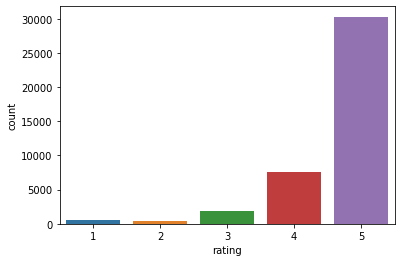

In [ ]:
sn.countplot(dt['rating'])

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='category', ylabel='count'>

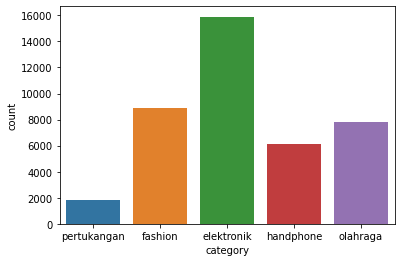

In [ ]:
sn.countplot(dt['category'])

C:\Users\USER\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='category', ylabel='sold'>

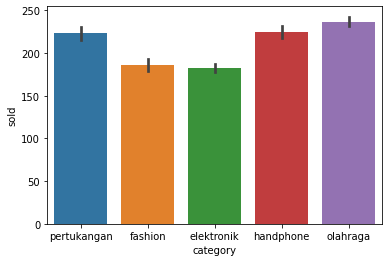

In [ ]:
sn.barplot(dt['category'], dt['sold'])

### 2. Distance based Filtering

In [ ]:
!pip install spacy

  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.0
    Uninstalling typing-extensions-4.0.0:
      Successfully uninstalled typing-extensions-4.0.0


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [ ]:
import spacy

In [ ]:
! python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
title0 = nlp(dt.product_name[0])
title1 = nlp(dt.product_name[1])

In [ ]:
title0, title1

(Staples Dekorasi Staples Kayu + Refill 8mm - Staples Gun 4-8 mm C Mart,
 STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708)

In [ ]:
len(title0.vector), len(title1.vector)

(96, 96)

In [ ]:
dt.isna().sum()

id              0
rating          0
product_name    0
product_id      0
shop_id         0
dtype: int64

In [ ]:
dt.duplicated().sum()

0

In [ ]:
dt.shape

(40607, 4)

In [ ]:
dt.head()

,id,rating,product_name,product_id,shop_id
0,1,5,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1740837
1,2,5,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,1477109
2,3,5,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,1477109
3,4,5,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,771395
4,5,5,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,969999


In [ ]:
title0.similarity(title1)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  """Entry point for launching an IPython kernel.


0.7699190053881906

In [ ]:
story_similarity = []

In [ ]:
%%time 

for story_row in dt.product_name[:100]:
    for story_column in dt.product_name[:100]:
        story_sim = nlp(story_row).similarity(nlp(story_column))
        story_similarity.append([story_row, story_column, story_sim])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 3min


In [ ]:
story_similarity=pd.DataFrame(story_similarity, columns=["story1","story2","similarity"]).append

In [ ]:
story_similarity.reset_index()

,index,story1,story2,similarity
0,0,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Staples Dekorasi Staples Kayu + Refill 8mm - S...,1.000000
1,1,Staples Dekorasi Staples Kayu + Refill 8mm - S...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,0.769919
2,2,Staples Dekorasi Staples Kayu + Refill 8mm - S...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,0.769919
3,3,Staples Dekorasi Staples Kayu + Refill 8mm - S...,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,0.674645
4,4,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,0.857041
...,...,...,...,...
9995,9995,Isi Staples Tembak 8 mm best guard,Isi Staples Tembak 8 mm best guard,1.000000
9996,9996,Isi Staples Tembak 8 mm best guard,Isi Staples Tembak 8 mm best guard,1.000000
9997,9997,Isi Staples Tembak 8 mm best guard,Isi Staples Tembak 8 mm best guard,1.000000
9998,9998,Isi Staples Tembak 8 mm best guard,Isi Staples Tembak 8 mm best guard,1.000000


In [ ]:
story_similarity.head(40)

,story1,story2,similarity
0,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Staples Dekorasi Staples Kayu + Refill 8mm - S...,1.000000
1,Staples Dekorasi Staples Kayu + Refill 8mm - S...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,0.769919
2,Staples Dekorasi Staples Kayu + Refill 8mm - S...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,0.769919
3,Staples Dekorasi Staples Kayu + Refill 8mm - S...,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,0.674645
4,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,0.857041
5,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,0.857041
6,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,0.857041
7,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,0.857041
8,Staples Dekorasi Staples Kayu + Refill 8mm - S...,refill staples gun tacker manual isi paku temb...,0.661435
9,Staples Dekorasi Staples Kayu + Refill 8mm - S...,refill staples gun tacker manual isi paku temb...,0.661435


In [ ]:
story_similarity.rset_index(inplace=True)

In [ ]:
story_similarity.nunique()

story1         9
story2         9
similarity    37
dtype: int64

In [ ]:
story_similarity=story_similarity.drop(['index'], axis=1)

In [ ]:
story_similarity.index.name = None

In [ ]:
story_similarity.head()

,story1,story2,similarity
0,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Staples Dekorasi Staples Kayu + Refill 8mm - S...,1.000000
1,Staples Dekorasi Staples Kayu + Refill 8mm - S...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,0.769919
2,Staples Dekorasi Staples Kayu + Refill 8mm - S...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,0.769919
3,Staples Dekorasi Staples Kayu + Refill 8mm - S...,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,0.674645
4,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,0.857041


In [ ]:
story_similarity.duplicated().sum()

9919

In [ ]:
story_similarity.shape

(10000, 3)

In [ ]:
story_similarity=story_similarity.drop_duplicates()

In [ ]:
story_similarity.shape

(81, 3)

In [ ]:
story_similarity.head()

,story1,story2,similarity
0,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Staples Dekorasi Staples Kayu + Refill 8mm - S...,1.000000
1,Staples Dekorasi Staples Kayu + Refill 8mm - S...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,0.769919
3,Staples Dekorasi Staples Kayu + Refill 8mm - S...,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,0.674645
4,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,0.857041
8,Staples Dekorasi Staples Kayu + Refill 8mm - S...,refill staples gun tacker manual isi paku temb...,0.661435


In [ ]:
similarity_matrix =story_similarity.pivot(index='story1',
        columns='story2',
        values='similarity')

In [ ]:
similarity_matrix.head(30)

story2,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; OSSEL 1022J,Electric Rivet Gun Adapter,ISI REFILL Staple Stapel Straples Streples Staples Paku tembak GUN,Isi Refill Staples Jok Kulit Motor / Staple Gun Max t3-10 mb MAX,Isi Staples Tembak 8 mm best guard,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708,Staple Gun 3 in 1 Mollar Staples Tembak Stapler Tacker Hekter Heckter,Staples Dekorasi Staples Kayu + Refill 8mm - Staples Gun 4-8 mm C Mart,refill staples gun tacker manual isi paku tembak model bread nail 14mm
story1,,,,,,,,,
ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; OSSEL 1022J,1.000000,0.651293,0.560478,0.674633,0.622309,0.751036,0.668105,0.674645,0.587251
Electric Rivet Gun Adapter,0.651293,1.000000,0.795144,0.846239,0.708044,0.699016,0.845827,0.659949,0.709897
ISI REFILL Staple Stapel Straples Streples Staples Paku tembak GUN,0.560478,0.795144,1.000000,0.799919,0.762014,0.638759,0.852118,0.672351,0.801751
Isi Refill Staples Jok Kulit Motor / Staple Gun Max t3-10 mb MAX,0.674633,0.846239,0.799919,1.000000,0.747681,0.794626,0.886889,0.857041,0.774126
Isi Staples Tembak 8 mm best guard,0.622309,0.708044,0.762014,0.747681,1.000000,0.712080,0.759598,0.741735,0.787753
STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708,0.751036,0.699016,0.638759,0.794626,0.712080,1.000000,0.783936,0.769919,0.731979
Staple Gun 3 in 1 Mollar Staples Tembak Stapler Tacker Hekter Heckter,0.668105,0.845827,0.852118,0.886889,0.759598,0.783936,1.000000,0.808163,0.774495
Staples Dekorasi Staples Kayu + Refill 8mm - Staples Gun 4-8 mm C Mart,0.674645,0.659949,0.672351,0.857041,0.741735,0.769919,0.808163,1.000000,0.661435
refill staples gun tacker manual isi paku tembak model bread nail 14mm,0.587251,0.709897,0.801751,0.774126,0.787753,0.731979,0.774495,0.661435,1.000000


In [ ]:
similarity_matrix.iloc[:4,]


story2,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; OSSEL 1022J,Electric Rivet Gun Adapter,ISI REFILL Staple Stapel Straples Streples Staples Paku tembak GUN,Isi Refill Staples Jok Kulit Motor / Staple Gun Max t3-10 mb MAX,Isi Staples Tembak 8 mm best guard,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708,Staple Gun 3 in 1 Mollar Staples Tembak Stapler Tacker Hekter Heckter,Staples Dekorasi Staples Kayu + Refill 8mm - Staples Gun 4-8 mm C Mart,refill staples gun tacker manual isi paku tembak model bread nail 14mm
story1,,,,,,,,,
ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; OSSEL 1022J,1.000000,0.651293,0.560478,0.674633,0.622309,0.751036,0.668105,0.674645,0.587251
Electric Rivet Gun Adapter,0.651293,1.000000,0.795144,0.846239,0.708044,0.699016,0.845827,0.659949,0.709897
ISI REFILL Staple Stapel Straples Streples Staples Paku tembak GUN,0.560478,0.795144,1.000000,0.799919,0.762014,0.638759,0.852118,0.672351,0.801751
Isi Refill Staples Jok Kulit Motor / Staple Gun Max t3-10 mb MAX,0.674633,0.846239,0.799919,1.000000,0.747681,0.794626,0.886889,0.857041,0.774126


In [ ]:
data_neighbours = pd.DataFrame(index=similarity_matrix.columns,columns=range(1,4))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(similarity_matrix.columns)):
    data_neighbours.iloc[i,:3] = similarity_matrix.iloc[0:,i].sort_values(ascending=False)[:3].index

In [ ]:
data_neighbours.rename(columns={1:'rekomendasi1',2:'rekomendasi2',3:'recomendasi3'})

,rekomendasi1,rekomendasi2,recomendasi3
story2,,,
ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; OSSEL 1022J,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,Staples Dekorasi Staples Kayu + Refill 8mm - S...
Electric Rivet Gun Adapter,Electric Rivet Gun Adapter,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...
ISI REFILL Staple Stapel Straples Streples Staples Paku tembak GUN,ISI REFILL Staple Stapel Straples Streples Sta...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...,refill staples gun tacker manual isi paku temb...
Isi Refill Staples Jok Kulit Motor / Staple Gun Max t3-10 mb MAX,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...,Staples Dekorasi Staples Kayu + Refill 8mm - S...
Isi Staples Tembak 8 mm best guard,Isi Staples Tembak 8 mm best guard,refill staples gun tacker manual isi paku temb...,ISI REFILL Staple Stapel Straples Streples Sta...
STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...
Staple Gun 3 in 1 Mollar Staples Tembak Stapler Tacker Hekter Heckter,Staple Gun 3 in 1 Mollar Staples Tembak Staple...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,ISI REFILL Staple Stapel Straples Streples Sta...
Staples Dekorasi Staples Kayu + Refill 8mm - Staples Gun 4-8 mm C Mart,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...
refill staples gun tacker manual isi paku tembak model bread nail 14mm,refill staples gun tacker manual isi paku temb...,ISI REFILL Staple Stapel Straples Streples Sta...,Isi Staples Tembak 8 mm best guard


In [ ]:
data_neighbours.head(15)

,1,2,3
story2,,,
ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; OSSEL 1022J,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,Staples Dekorasi Staples Kayu + Refill 8mm - S...
Electric Rivet Gun Adapter,Electric Rivet Gun Adapter,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...
ISI REFILL Staple Stapel Straples Streples Staples Paku tembak GUN,ISI REFILL Staple Stapel Straples Streples Sta...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...,refill staples gun tacker manual isi paku temb...
Isi Refill Staples Jok Kulit Motor / Staple Gun Max t3-10 mb MAX,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...,Staples Dekorasi Staples Kayu + Refill 8mm - S...
Isi Staples Tembak 8 mm best guard,Isi Staples Tembak 8 mm best guard,refill staples gun tacker manual isi paku temb...,ISI REFILL Staple Stapel Straples Streples Sta...
STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMBAK HEKTER 022708,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...
Staple Gun 3 in 1 Mollar Staples Tembak Stapler Tacker Hekter Heckter,Staple Gun 3 in 1 Mollar Staples Tembak Staple...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,ISI REFILL Staple Stapel Straples Streples Sta...
Staples Dekorasi Staples Kayu + Refill 8mm - Staples Gun 4-8 mm C Mart,Staples Dekorasi Staples Kayu + Refill 8mm - S...,Isi Refill Staples Jok Kulit Motor / Staple Gu...,Staple Gun 3 in 1 Mollar Staples Tembak Staple...
refill staples gun tacker manual isi paku tembak model bread nail 14mm,refill staples gun tacker manual isi paku temb...,ISI REFILL Staple Stapel Straples Streples Sta...,Isi Staples Tembak 8 mm best guard


### 3. Content-based Recomendation

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
#putting movies data on 'movies' dataframe

In [ ]:
dt=pd.read_csv('product_reviews_tokped.csv', low_memory=False)

In [ ]:
dt=dt[['text','product_name','rating']]

In [ ]:
dt=dt[['text','rating']]

In [ ]:
dt=dt.sample(5000,random_state=88)

In [ ]:
dt[dt['product_name'].index <2000]

,text,product_name,rating
459,kirim nya cepat produk lumayan,Staple Gun / Staples Tembak / Staples Jok / He...,5
636,barang sesuai deskripsi pengiriman cepat,staples tembak HOMASTER / steples tembak / sta...,5
345,barang sudah sampai terimakasih next time ord...,Gun Tacker / Staples Tembak/ Staples Jok KANTYU,5
615,barang sesuai ulasan mantap,staples tembak HOMASTER / steples tembak / sta...,4
1177,barang ok banget siiiiiiiiiiiiiiiiiiiipppp,Staples Gun Tacker 4-14mm 3in1 3 in 1 MURAH,5
...,...,...,...
503,tiba lebih cepat,Isi Staples / Gun Tacker 13/8 Ukuran 8 mm Harg...,5
151,,Staple Gun / Staples Tembak / Staples Jok / He...,5
1103,isi masih lebih bagus bawahannya staples gun t...,GUN TACKLER 3IN1. ALAT HEKTAR TEMBAK. STAPLES ...,5
957,responsif langsung diproses amp dikirim ga...,Staples Gun Tacker Mollar 3 in 1 / Staple Jok ...,5


In [ ]:
tfidf = TfidfVectorizer(stop_words=stopwordss)

In [ ]:
import re
import string

In [ ]:
from stop_words import get_stop_words

stopwordss = get_stop_words('indonesian')


In [ ]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
dt['text'] = dt['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)
# Removing special characters

In [ ]:
dt=dt.reset_index()

In [ ]:
dt['product_name']

0       THERMAL PASTA SUNTIK BESAR SILVER PENDINGIN PR...
1       X04 Rak sepatu 4 SUSUN payung holder lemari se...
2       BATA Sepatu Pria NEVADA 8114038 - Cokelat Tua, 40
3       Decker / Dekker Lutut / Knee Support Open Pate...
4       Alfalink EI 21SE - Kamus Elektronik Electronic...
                              ...                        
4995    USB HUB 4 port USB 3.0 / USB HUB 3.0 &#40;4por...
4996    TINTA / CATRIDGE HP 680 BLACK / COLOR ORIGINAL...
4997           TP-LINK TL-WR 840N 300MBps Wireless Router
4998    USB HUB 3.0 7 port by DIGIGEAR HIGH SPEED 1.2 ...
4999    Gamepad single Usb M-Tech/stick laptop/stick p...
Name: product_name, Length: 5000, dtype: object

In [ ]:
!pip install stop-words

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=2565f00c98eee3913ef72a4b615d6700903af3c48bd037933224ce095366c0e8
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\fb\86\b2\277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [ ]:
#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
overview_matrix = tfidf.fit_transform(dt['text'])
#Output the shape of tfidf_matrix
overview_matrix.shape

(5000, 4097)

In [ ]:
similarity_matrix = linear_kernel(overview_matrix,overview_matrix)
similarity_matrix

array([[1.        , 0.        , 0.18922659, ..., 0.12487156, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.10830709],
       [0.18922659, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12487156, 0.        , 0.        , ..., 1.        , 0.642883  ,
        0.05345765],
       [0.        , 0.        , 0.        , ..., 0.642883  , 1.        ,
        0.083153  ],
       [0.        , 0.10830709, 0.        , ..., 0.05345765, 0.083153  ,
        1.        ]])

In [ ]:
#movies index mapping
mapping = pd.Series(dt.index,index = dt['product_name'])
mapping

product_name
THERMAL PASTA SUNTIK BESAR SILVER PENDINGIN PROCESSOR / THERMAL GREASE           0
X04 Rak sepatu 4 SUSUN payung holder lemari sepatu murah                         1
BATA Sepatu Pria NEVADA 8114038 - Cokelat Tua, 40                                2
Decker / Dekker Lutut / Knee Support Open Patela WInstar 611                     3
Alfalink EI 21SE - Kamus Elektronik Electronic Dictionary EI-21SE                4
                                                                              ... 
USB HUB 4 port USB 3.0 / USB HUB 3.0 &#40;4port&#41; DIGIGEAR HIGH QUALITY    4995
TINTA / CATRIDGE HP 680 BLACK / COLOR ORIGINAL 100%                           4996
TP-LINK TL-WR 840N 300MBps Wireless Router                                    4997
USB HUB 3.0 7 port by DIGIGEAR HIGH SPEED 1.2 meter                           4998
Gamepad single Usb M-Tech/stick laptop/stick pc/joystick                      4999
Length: 5000, dtype: int64

In [ ]:
dt['product_name'].unique()

array(['THERMAL PASTA SUNTIK BESAR SILVER PENDINGIN PROCESSOR / THERMAL GREASE',
       'X04 Rak sepatu 4 SUSUN payung holder lemari sepatu murah',
       'BATA Sepatu Pria NEVADA 8114038 - Cokelat Tua, 40', ...,
       'Adaptor Charger Laptop Lenovo IdeaPad B40 B40-30 B40-45 B40-70 B40-80',
       '&#40;EH141&#41;Mp3 Suffle Mini LCD Pemutar Music Player Bahan Besi Slot Memory',
       'Sepatu Bata Xandy Black - 8516336'], dtype=object)

In [ ]:
def recommend_product(inputs):
    dt_indes = mapping[inputs]
#get similarity values with other movies
#similarity_score is the list of index and similarity matrix
    similarity_score = list(enumerate(similarity_matrix[dt_indes]))
#sort in descending order the similarity score of movie inputted with all the other movies
    similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
# Get the scores of the 15 most similar movies. Ignore the first movie.
    similarity_score = similarity_score[1:15]
#return movie names using the mapping series
    indices = [i[0] for i in similarity_score]
    return (dt['product_name'].iloc[indices])

In [ ]:
print('Rekomendasi Produk berdasarkan review untuk produk : THERMAL PASTA SUNTIK BESAR SILVER PENDINGIN PROCESSOR / THERMAL GREASE ')
recommend_product('THERMAL PASTA SUNTIK BESAR SILVER PENDINGIN PROCESSOR / THERMAL GREASE')

Rekomendasi Produk berdasarkan review untuk produk : THERMAL PASTA SUNTIK BESAR SILVER PENDINGIN PROCESSOR / THERMAL GREASE 


4628    TINTA / CATRIDGE HP 680 BLACK / COLOR ORIGINAL...
3473          ABS AB Roller Double Wheel Exercise Kettler
3486    &#40;FJ068&#41; Headset / Handsfree Xiaomi MI ...
1616    Deker / Dekker Lutut / Knee Support Open Patel...
1106    Gamepad single Usb M-Tech/stick laptop/stick p...
951     Switch HUB TP LINK 5 Port TL-SF1005D 10/100Mbp...
4773    COOLINGPAD LIPAT KEPITING 14 INCH / COOLING FA...
394            Jam Tangan Pria Teiwe Collection TC-CG3002
4970    Baterai ORIGINAL Sony VPC-B, M, S, Y Series VG...
1992    Jam Tangan Pria TIMEX Analog Elevated - TW4B06600
840     TOSHIBA FLASH AIR WIRELESS SD CARD 32GB ORIGIN...
756     Alfalink EI 215 - Kamus Elektronik Alfalink EI...
3353    staples tembak HOMASTER / steples tembak / sta...
860                 Mouse Wireless Logitech M170 Original
Name: product_name, dtype: object